In [7]:
import geopandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import fiona
import shapely
import geopandas
import seaborn as sns

In [28]:
def clean_IQR(df_in, columns= ['odometer', 'gallons', 'cost_per_gallon_float', 'total_spent_float', 'mpg', 'miles'],iqr_scale = 1.5,plot = False):
    temp_df = df_in.copy()
    
    # Filter the DataFrame for the current currency
    
    for column in columns:
        Q1 = float(temp_df[column].quantile(0.25))
        Q3 = float(temp_df[column].quantile(0.75))
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_scale * IQR
        upper_bound = Q3 + iqr_scale * IQR

        # Filter the data based on the calculated bounds
        temp_df = temp_df[(temp_df[column] >= lower_bound) & (temp_df[column] <= upper_bound)]
        if (plot):
            print("Entris removed",df_in.shape[0]-temp_df.shape[0])
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.hist(df_in[column], bins=10, edgecolor='black')
            plt.title(f'{column} Before Cleaning')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(True, linestyle='--', alpha=0.7)     
            
            plt.subplot(1, 2, 2)
            plt.hist(temp_df[column], bins=10, edgecolor='black')
            plt.title(f'{column} After Cleaning')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(True, linestyle='--', alpha=0.7)   
            
            plt.tight_layout()
            plt.show()            

    # Update temp_df with the filtered country_df
    
    return temp_df      



In [9]:
df = pd.read_file('nyc_taxis.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982154846191406,40.767936706542969,-73.964630126953125,40.765602111816406,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415344238281,40.738563537597656,-73.999481201171875,40.731151580810547,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979026794433594,40.763938903808594,-74.005332946777344,40.710086822509766,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040283203125,40.719970703125,-74.01226806640625,40.706718444824219,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973052978515625,40.793209075927734,-73.972923278808594,40.782520294189453,N,435


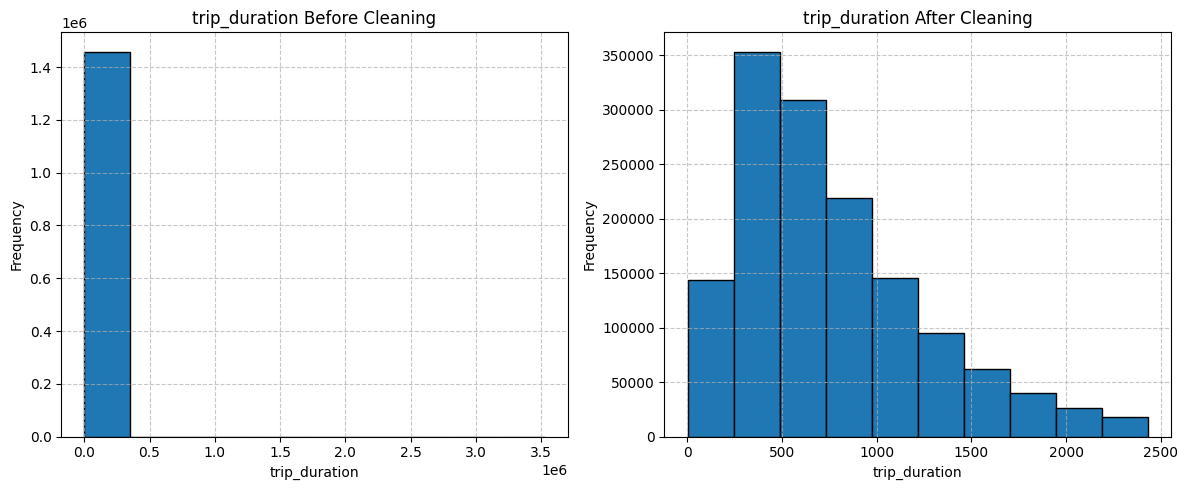

Entris removed 47548


In [30]:

df['trip_duration'] = df['trip_duration'].astype(int)
df_cleaned = clean_IQR(df,columns=['trip_duration'],iqr_scale=2,plot=True)



